# **Machine Learning numerical project**





# **Index**
>## **Logistic regression Functions from scratch**
>> **Split data**

>> **Logistic function**

>> **Gradients logistic**

>> **Stochastic Gradient Descent Logistic**

>> **Prediction function logistic**

>> **Logistic Regression SGD**

>> **Nesterov Accelerated Gradient logistic**

>> **Logistic Regression NAG**

>## **Softmax regression Functions from scratch**

>> **One hot encoding**

>> **Probability function softmax**

>> **Gradient softmax**

>> **Stochastic Gradient Descent softmax**

>> **Softmax regression SGD**

>> **Nesterov Accelerated Gradient softmax**

>> **Softmax_regression_NAG**

> ## **Creation of the artificial data**

>>  **Train and prediction with the constructed functions for logistic regression**

> ## **MNIST data**

>> **Selection of two numbers to proof the logistic regression**

> # **Softmax regression**

>> **Train and prediction with the MNIST data with the constructed functions for softmax**

# **Logistic regression Functions**

In [102]:
#Split the data
def split_data(x, y):
  '''
  This function takes two arrays and split it into a training data with 90% 
  of the total data, and a test data with the 10% of the total.
  n --> number of data points
  k --> number of features
  x is an array of dimension (k, n)
  y is an array of dimension (1, n)
  '''
  # Number of points for the test data
  N_points = x.shape[1]
  N_test = N_points//10  
  index = np.random.choice(N_points, N_test, replace=False)   #Generate a uniform random sample from np.arange(N_points) of size N_test without replacement
  
  #Test and Training dataset with classification
  x_test= x[:, index]                     
  x_train = np.delete(x,index,axis=1)   

  #Test and Training classification label 
  y_test = y[:, index]  
  y_train = np.delete(y,index, axis=1)

  return   x_test, x_train, y_test, y_train


#Logistic function
def logistic(s):
    '''
    This function is a classifier that returns the probability 
    to belong to the class 0 or 1
    '''
    return 1 / (1 + np.exp(-s))  


#Gradients function with L2 regularization for the logistic regression
def Gradients_logistic(w, x, y, penalization):
    '''
    Gradient of the logistic function with L2 regularization
    n --> number of data points
    k --> number of features
    x is an array of dimension (k, n)
    y is an array of dimension (1, n)
    w is an array of dimension (k, 1)
    This function returns an array with the same dime as w
    '''
    #Logistic function
    s = np.dot(w.T,x)    
    sigma = logistic(s)
   
    #Gradient weights
    dw = (np.dot(x, (sigma-y).T))/x.shape[1] + 2*penalization*w # x.shape[1]  is for scaling
    
    return dw

def Stochastic_Gradient_Descent_Logistic(w,x,y,learning_rate, penalization, epoch, batch_size):
    '''
    Function stochastic gradient descent with L2 regularization for the logistic function
    n --> number of data points
    k --> number of features
    x is an array of dimension (k, n)
    y is an array of dimension (1, n)
    w is an array of dimension (k, 1)
    Here batch_size is the size of the minibatch
    '''
    for _ in range(epoch):
        #Selecting randomly an array of size 'batch_size'
        index = np.random.choice(x.shape[1], batches, replace=False)  #Generate a uniform random sample from np.arange(x.shape[1]) of size batches without replacement

        #Creating the minibatch   
        x_batch = x[:,index]
        y_batch = y[:,index]

        #Computing the gradient
        gradient_weight = Gradients_logistic(w, x_batch, y_batch, penalization)
        
        #Update the weight
        w = w - learning_rate*gradient_weight
                         
    return w

def prediction_function_logistic(w,x):
    '''
    This function returns the corresponding class 0 or 1
    by which the points xi belong. i = 1, 2, ..., n
    n --> number of data points
    k --> number of features
    x is an array of dimension (k, n)
    w is an array of dimension (k, 1)
    '''
    s = np.dot(w.T,x)
    sigma = logistic(s)
    sigma_prediction = np.zeros([1,x.shape[1]])   #To save values
    iterations = sigma.shape[1]
    
    #Classifing
    for i in range(iterations):
        if sigma[0,i]>= 0.5:
            sigma_prediction[0,i] = 1 
        else:
            sigma_prediction[0,i] = 0 

    return sigma_prediction  #This is an array of dimension (1,n)

#Logistic Regression function with stochastic gradient descent
def logistic_regression_SGD(x_train, y_train, x_test, y_test, penalization, learning_rate , epoch , batches):
    '''
    l = number of test examples
    m = number of training examples
    k --> number of features
    w  -->  dim = (k, 1)
    x_train --> dim = (k, m)         x_test --> dim = (k, l)
    y_train --> dim = (1, m)         y_test --> dim = (1, l)
    '''
    #Initialization
    n = x_train.shape[0]
    w = np.random.rand(n, 1)

    #Training
    w_new = Stochastic_Gradient_Descent_Logistic(w, x_train,y_train,learning_rate, penalization, epoch, batches)
    
    #Prediction
    sigma_prediction_test = prediction_function_logistic(w_new,  x_test)
    sigma_prediction_train = prediction_function_logistic(w_new, x_train)

    #Accuracy computation
    accuracy_train = np.mean(sigma_prediction_train == y_train)
    accuracy_test = np.mean(sigma_prediction_test == y_test)
    
    return sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train


def Nesterov_Accelerated_Gradient_logistic(w,x,y,learning_rate, penalization, momentum, epoch, batch_size):
    '''
    Function Nesterov Accelerated Gradient with L2 regularization for the logistic regression
    n --> number of data points
    k --> number of features
    x is an array of dimension (k, n)
    y is an array of dimension (1, n)
    w is an array of dimension (k, 1)
    Here batch_size is the size of the minibatch
    '''
    #Initial velocity  
    w_t_1 = 0

    for _ in range(epoch):

        #Selecting randomly an array of size 'batch_size'
        index = np.random.choice(x.shape[1], batches, replace=False)  #Generate a uniform random sample from np.arange(x.shape[1]) of size batches without replacement

        #Creating the minibatch     
        x_batch = x[:,index]
        y_batch = y[:,index]
            
        #Computing the gradients
        gradient_weight = Gradients_logistic(w -momentum*w_t_1, x_batch, y_batch,penalization)
        
        #Update weight
        w_t_1 = momentum*w_t_1 + learning_rate*gradient_weight
        w = w - w_t_1
          
    return w

#Logistic Regression function with stochastic gradient descent
def logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, learning_rate ,momentum, epoch , batches):
    '''
    l = number of test examples
    m = number of training examples
    k = number of features
    w  -->  dim = (k, 1)
    x_train --> dim = (k, m)         x_test --> dim = (k, l)
    y_train --> dim = (1, m)         y_test --> dim = (1, l)
    The parameter batches is the size of the set selected randomly from the data x
    '''
    #Initialization
    n = x_train.shape[0]
    w = np.random.rand(n, 1)

    #Training
    w_new = Nesterov_Accelerated_Gradient_logistic(w,x_train,y_train,learning_rate, penalization, momentum, epoch, batches)
    
    #Prediction
    sigma_prediction_test = prediction_function_logistic(w_new , x_test)
    sigma_prediction_train = prediction_function_logistic(w_new , x_train)

    #Accuracy computation
    accuracy_train = np.mean(sigma_prediction_train == y_train)
    accuracy_test = np.mean(sigma_prediction_test == y_test)

    return sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train


# **Softmax regression Functions**

In [103]:
#Encoding
def one_hot_encoding(y, m):
    ''' 
    This function takes a vector of y of dimension (1,n) and transform it
    to a binary vectors of dimension (m, n)
    n = Number of data points 
    m = Number of classes
    '''
    one_hot = np.zeros((m, y.shape[1]))
  
    one_hot[y, np.arange(y.shape[1])] = 1
    return one_hot

def Probabilities(w,x):    
    '''
    This function returns the probability that a data point xi belongs to a class m.
    i --> 1,2...,n
    m: numer of classes
    n: number of data points --> x.shape[1]
    k: number of features
    w --> (k, m)
    x --> (k, n)
    '''
    z = np.dot(w.T, x)

    #To avoid overflow, it is recommended to sustract the maximum value of each row(axis = 0)
    b = np.ones(z.shape)*np.array([np.amax(z, axis = 0)]) 
    exponent = np.exp(z-b)
    
    #Computing the sum over all the possible values
    partition_function =np.sum(exponent, axis =0)

    return exponent/partition_function   #dimensions --> (m, n)

def Gradient_softmax(w, x, y, penalization):
    '''
    Gradient of the softmax with L2 regularization
    m: numer of classes
    n: number of data points --> x.shape[1]
    k: number of features
    x--> (k,n)   p : y --> (m, n)
    w--> (k, m)   
    '''
    #Computing the probabilities
    p = Probabilities(w,x)

    #Gradient weights
    dw = (np.dot(x, (p-y).T))/x.shape[1] + 2*penalization*w   # x.shape[1]  is for scaling
  
    return  dw

def Stochastic_Gradient_Descent_softmax(w,x,y,learning_rate, penalization, epoch, batches):
    '''
    Function stochastic gradient descent with L2 regularization for Softmax regression
    n --> number of data points
    k --> number of features
    m: numer of classes
    x is an array of dimension (k, n)
    y is an array of dimension (m, n)
    w is an array of dimension (k, m)
    Here batch_size is the size of the minibatch
    '''
    for _ in range(epoch):
    
        #Selecting randomly an array of size 'batch_size'
        index = np.random.choice(x.shape[1], batches, replace=False)   #Generate a uniform random sample from np.arange(x.shape[1]) of size batches without replacement
        
        #Creating the minibatch    
        x_batch = x[:,index]
        y_batch = y[:,index]

        #Computing the gradients    
        gradient_weight = Gradient_softmax(w, x_batch, y_batch, penalization)
        
        #Update the weight
        w = w - learning_rate*gradient_weight
    
    return w

#Stochastic Gradient Descent
def softmax_regression_SGD(x_train, y_train, x_test, y_test, penalization, learning_rate, epoch, batches, method):
    '''
    Function Softmax regression with SGD
    m: numer of classes
    n: number of data points --> x.shape[1]
    k: number of features
    w --> (k, m)    p : y --> (m, n)
    x --> (k, n)
    The parameter batches is the size of the set selected randomly from the data x
    '''
    #Initialization
    k = x_train.shape[0]
    m = y_train.shape[0]

    w = np.zeros((k, m)) 

    #Training the model
    #Update weight
    w_softmax = Stochastic_Gradient_Descent_softmax(w, x_train, y_train, penalization, learning_rate, epoch, batches)

    #Predicting with the test data
    p_new_test = Probabilities(w_softmax,x_test)
    #Selecting the label with higher probability
    y_softmax_test = np.array([np.argmax(p_new_test, axis =0)]) 
    
    #Predicting with the training data
    p_new_train = Probabilities(w_softmax, x_train)
    #Selecting the label with higher probability
    y_softmax_train = np.array([np.argmax(p_new_train, axis =0)]) 
    
    
    #Transform it to a matrix of size (n, k) of zeros and ones
    y_softmax_train = one_hot_encoding(y_softmax_train, m)
    y_softmax_test = one_hot_encoding(y_softmax_test, m)

    #Accuracy computation
    accuracy_train = np.mean(y_softmax_train == y_train) 
    accuracy_test = np.mean(y_softmax_test == y_test) 
    
    return y_softmax_test, y_softmax_train, accuracy_test, accuracy_train


#Nesterov Accelerated Gradient_softmax
def Nesterov_Accelerated_Gradient_softmax(w,x,y,learning_rate, penalization, momentum, epoch, batches):
    '''
    Function Nesterov Accelerated Gradient with L2 regularization for the softmax regression
    n --> number of data points
    k --> number of features
    m: numer of classes
    x is an array of dimension (k, n)
    y is an array of dimension (m, n)
    w is an array of dimension (k, m)
    Here batch_size is the size of the minibatch
    '''
    #Initial velocity  
    w_t_1 = 0
    
    for _ in range(epoch):
        
        #Selecting randomly an array of size 'batch_size'
        index = np.random.choice(x.shape[1], batches, replace=False)   #Generate a uniform random sample from np.arange(x.shape[1]) of size batches without replacement

        #Creating the minibatch       
        x_batch = x[:,index]
        y_batch = y[:,index]

        #Computing the gradients
        gradient_weight = Gradient_softmax(w -momentum*w_t_1, x_batch, y_batch,penalization)
        
        #Update weight
        w_t_1 = momentum*w_t_1 + learning_rate*gradient_weight
        w = w - w_t_1
            
    return w

def softmax_regression_NAG(x_train, y_train, x_test, y_test, penalization, learning_rate, momentum, epoch, batches):
    '''
    Function Softmax regression with NAG
    m: numer of classes
    n: number of data points --> x.shape[1]
    k: number of features
    w --> (k, m)    p : y --> (m, n)
    x --> (k, n)
    The parameter batches is the size of the set selected randomly from the data x
    '''
    #Initialization
    k = x_train.shape[0]
    n = y_train.shape[0]

    w = np.zeros((k, n)) #np.random.rand(k, n)  

    #Training the model
    #Update weight
    w_softmax = Nesterov_Accelerated_Gradient_softmax(w, x_train, y_train, penalization, learning_rate, momentum, epoch, batches)

    #Predicting with the test data
    p_new_test = Probabilities(w_softmax,x_test)
    #Selecting the label with higher probability
    y_softmax_test = np.array([np.argmax(p_new_test, axis =0)]) 
    
    #Predicting with the training data
    p_new_train = Probabilities(w_softmax, x_train)
    #Selecting the label with higher probability
    y_softmax_train = np.array([np.argmax(p_new_train, axis =0)]) 
    
    #Transform it to a matrix of size (n, k) of zeros and ones
    y_softmax_train = one_hot_encoding(y_softmax_train, n)
    y_softmax_test = one_hot_encoding(y_softmax_test, n)

    #Accuracy computation
    accuracy_train = np.mean(y_softmax_train == y_train) 
    accuracy_test = np.mean(y_softmax_test == y_test) 

    return y_softmax_test, y_softmax_train, accuracy_test, accuracy_train

# **Creating the data**

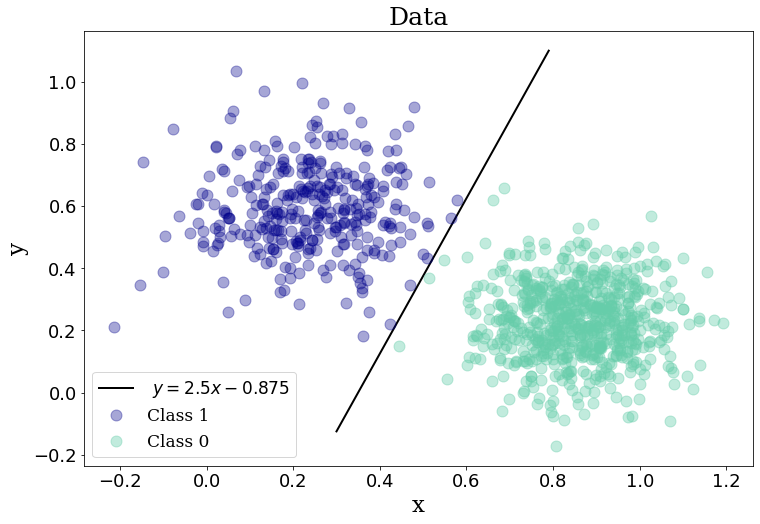

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')

#Constructing the data
def Data(N_points):
    frac = N_points//3
    x1 = np.random.normal(loc=0.25,scale=0.15, size=frac).reshape(-1,1)
    y1 = np.random.normal(loc=0.6, scale=0.15,size=frac).reshape(-1,1)
    data1 = np.concatenate((x1, y1),axis=1)
    x2 = np.random.normal(loc=0.85, scale=0.12,size=N_points - frac).reshape(-1,1)
    y2 = np.random.normal(loc=0.22, scale=0.12,size=N_points - frac).reshape(-1,1)
    data2 = np.concatenate((x2, y2),axis=1)
    return np.concatenate((data1, data2),axis=0).T


#Function Linear Classifier
def linear_data_classifier(X, weights,bias):   # dim weights  =  (1, N_classes),  dim X = (N_features, N_points)
  
    k = X.shape[1]
    y_hat = np.zeros([k,1]) #To save values

    s = np.dot(weights.T , X) + bias
    sigma = 1 / (1 + np.exp(-s))
    
    for i in range(k):
        if sigma[0,i]>= 0.5:    #if it is below the line
            y_hat[i] = 0
        else:             #if it is above the line
            y_hat[i] = 1
  
    return y_hat

#Defining the number of data points and labels
N_points = 1000    
X = Data(N_points)    

#Weights and bias
weights = np.array([[0.2],[-0.08]])  
bias = -0.07
Y = linear_data_classifier(X, weights,bias)  # Dimension = (1000, 1)

classified_data = np.concatenate((X.T, Y),axis=1)#data + label class 
#The classes to plot
cls1 = classified_data[classified_data[:,2] == 1]
cls0 = classified_data[classified_data[:,2] == 0]

#The choice of the weights and the bias above leads to the following line
x= np.arange(0.3,0.8, 0.01)
y = 2.5*x - 0.875  

# showing results
from matplotlib import style
style.use('fast')
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=2, color = 'k', label= r' $ y = 2.5x - 0.875$' )
plt.plot(cls1[:,0],cls1[:,1], "ob",color='darkblue', ms=11, alpha=0.35, label='Class 1')
plt.plot(cls0[:,0],cls0[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
plt.title("Data", size=25,family="serif")
plt.xlabel("x", size =23,family="serif")
plt.ylabel("y", size = 23,family="serif")
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.legend(prop={"size":17, "family": "serif" })

# **Logistic Regression**


# **Training and Prediction**

In [106]:
#Function normalize data:  
def normalization(X):
  '''
  Used when the distribution of the data is not known
  or when the distribution is not Gaussian
  '''
  return X/np.array([X.max(axis = 1)]).T

#Function standarize data
def standarize(X):
  '''
  Assumes that the data has a Gaussian distribution
  '''
  mean = np.array([X.mean(axis = 1)]).T
  st_d = np.array([X.std(axis=1)]).T
  return (X-mean)/st_d


In [107]:
#Normalization
X_normalize = normalization(X)

#Spliting the data
y = Y.T  #Changing the dimension of Y
x_test, x_train, y_test, y_train = split_data(X_normalize, y)

print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))


x_train: (2, 900)
y_train: (1, 900)
x_test:  (2, 100)
y_test:  (1, 100)


## Cross validation
Changing the parameters: **learning_rate** and **penalization**

In [ ]:
#Initialization parameters
epoch = 100
batches =200
momentum = 0.4

#Changing parameter: learning rate
learning_rate1 = np.linspace(0.00001,1, 100)

#Fix parameter: penalization
penalization = 0.00002 

# With SGD
test_accuracy_SGD = []
train_accuracy_SGD = []

for n in learning_rate1: 
    accuracy_test = logistic_regression_SGD(x_train, y_train, x_test, y_test, penalization, n , epoch , batches)[2]
    accuracy_train = logistic_regression_SGD(x_train, y_train, x_test, y_test, penalization, n , epoch , batches)[3]
  
    test_accuracy_SGD.append(accuracy_test)
    train_accuracy_SGD.append(accuracy_train)  


#With NAG
test_accuracy_NAG = []
train_accuracy_NAG = []

for n in learning_rate1:
    accuracy_test = logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, n ,momentum, epoch , batches)[2]
    accuracy_train = logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, n , momentum, epoch , batches)[3]
  
    test_accuracy_NAG.append(accuracy_test)
    train_accuracy_NAG.append(accuracy_train)  


#Changing parameter: penalization
penalization1 =np.linspace(0.00002,1, 100)

#Fix parameters: 
learning_rate = 0.3 
epoch = 100
batches =200
momentum = 0.4

# With SGD
test_accuracy_SGD2 = []
train_accuracy_SGD2 = []


for n in penalization1:
    accuracy_test = logistic_regression_SGD(x_train, y_train, x_test, y_test, n, learning_rate , epoch , batches)[2]
    accuracy_train = logistic_regression_SGD(x_train, y_train, x_test, y_test, n, learning_rate , epoch , batches)[3]
  
    test_accuracy_SGD2.append(accuracy_test)
    train_accuracy_SGD2.append(accuracy_train)  
   
#With NAG
test_accuracy_NAG2 = []
train_accuracy_NAG2 = []


for n in penalization1:
    accuracy_test = logistic_regression_NAG(x_train, y_train, x_test, y_test, n, learning_rate ,momentum, epoch , batches)[2]
    accuracy_train = logistic_regression_NAG(x_train, y_train, x_test, y_test, n, learning_rate , momentum, epoch , batches)[3]
  
    test_accuracy_NAG2.append(accuracy_test)
    train_accuracy_NAG2.append(accuracy_train)  


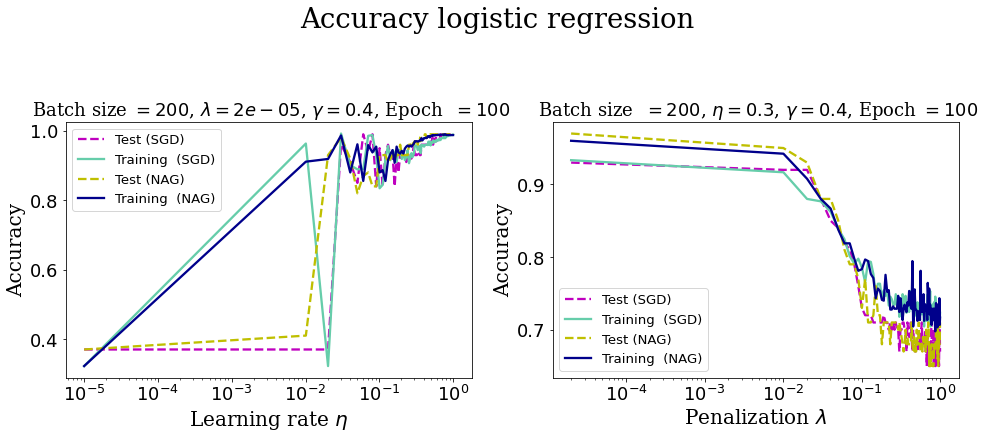

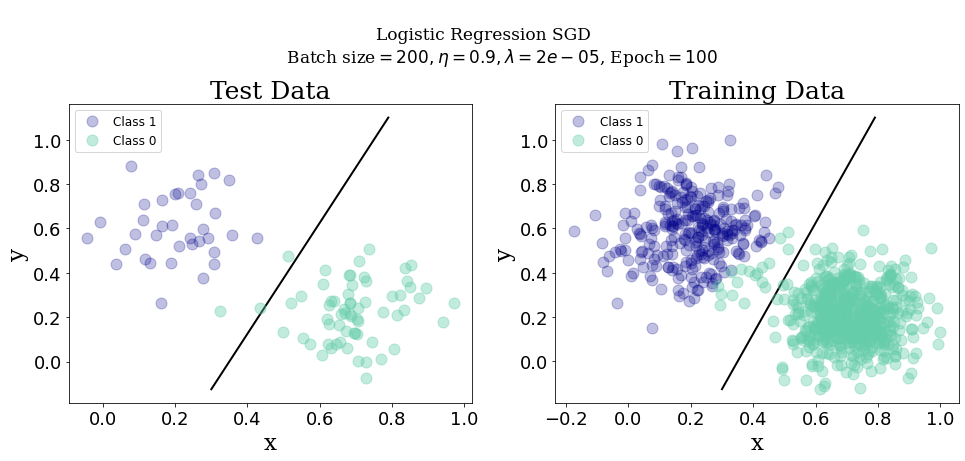

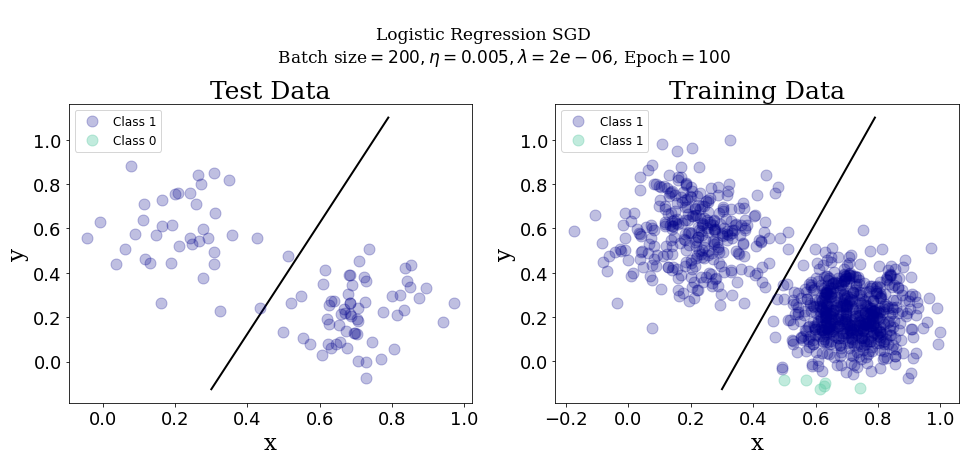

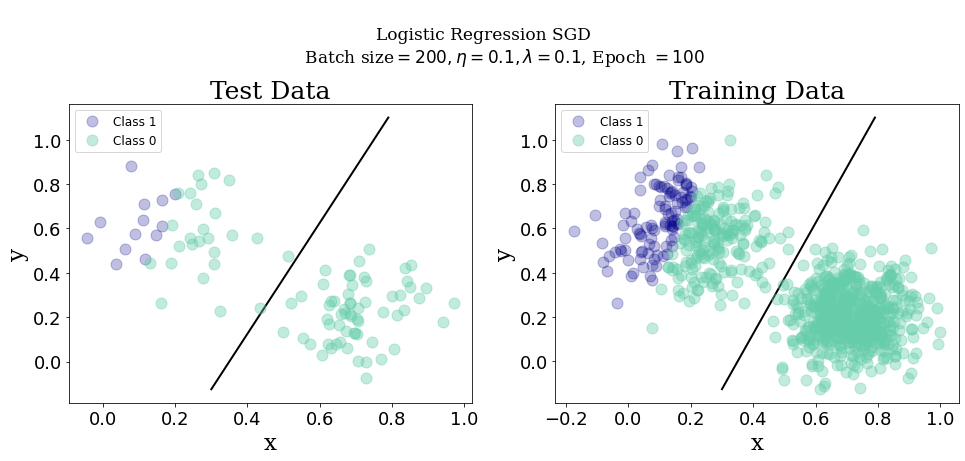

In [ ]:
#Parameters
epoch = 100
batches =200
momentum = 0.4
penalization = 0.00002 
penalization1 =np.linspace(0.00002,1, 100)

# showing results

fig = plt.figure(figsize=(16,16))
fig.suptitle("Accuracy logistic regression",family="serif", fontsize="27.5")

ax1= plt.subplot(321)
ax1.semilogx(learning_rate1,test_accuracy_SGD, '--', color = 'm',lw = 2.3,label = 'Test (SGD)')
ax1.semilogx(learning_rate1,train_accuracy_SGD, color = 'mediumaquamarine',lw = 2.3, label = 'Training  (SGD)')
ax1.semilogx(learning_rate1,test_accuracy_NAG,'--', color = 'y',lw = 2.3,label = 'Test (NAG)')
ax1.semilogx(learning_rate1,train_accuracy_NAG, color = 'darkblue',lw = 2.3, label = 'Training  (NAG)')
ax1.set_title(" \n Batch size $= {}$, $\lambda = {}$, $\gamma  = {} $, Epoch  $=  {}$".format(batches, penalization, momentum, epoch ), size=18,family="serif")
ax1.set_xlabel("Learning rate $\eta$", size =20,family="serif")
ax1.set_ylabel("Accuracy", size = 20,family="serif")
ax1.legend(prop={'size':13.3})

penalization =np.linspace(0.000002,0.2, 100)
learning_rate = 0.3 
ax2= plt.subplot(322)
ax2.semilogx(penalization1,test_accuracy_SGD2, '--', color = 'm',lw = 2.3, label = 'Test (SGD)')
ax2.semilogx(penalization1,train_accuracy_SGD2, color = 'mediumaquamarine',lw = 2.3, label = 'Training  (SGD)')
ax2.semilogx(penalization1,test_accuracy_NAG2, '--', color = 'y',lw = 2.3, label = 'Test (NAG)')
ax2.semilogx(penalization1,train_accuracy_NAG2, color = 'darkblue',lw = 2.3, label = 'Training  (NAG)')
ax2.set_title(" \n Batch size  $= {} $, $\eta  = {}$, $\gamma  = {} $, Epoch $= {}$".format(batches, learning_rate, momentum, epoch ), size=18,family="serif")
ax2.set_xlabel("Penalization $\lambda$", size =20,family="serif")
ax2.set_ylabel("Accuracy", size = 20,family="serif")
ax2.legend(prop={'size':13.3})
#ax2.set_xlim(10**-4,0.3)
#ax2.set_ylim(0.4,1.04)


epoch = 100
batches =200
momentum = 0.4
#1
learning_rate = 0.9
penalization = 0.00002
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = logistic_regression_SGD(x_train, y_train, x_test, y_test, penalization, learning_rate , epoch , batches)

data_prediction_test = np.concatenate((x_test.T, sigma_prediction_test.T),axis=1)
data_prediction_train = np.concatenate((x_train.T, sigma_prediction_train.T),axis=1)  

#The classes to plot
cls1_test = data_prediction_test[data_prediction_test[:,2] == 1]
cls2_test = data_prediction_test[data_prediction_test[:,2] == 0]

cls1_train = data_prediction_train[data_prediction_train[:,2] == 1]
cls2_train = data_prediction_train[data_prediction_train[:,2] == 0]

#Original line
x= np.arange(0.3,0.8, 0.01)
y = 2.5*x - 0.875  

fig, axs = plt.subplots(1, 2, figsize=(13.3, 6.3), constrained_layout=True)
fig.suptitle("\nLogistic Regression SGD\n $~~~~~~ $Batch size$ = {}, \eta = {}, \lambda = {}$, Epoch$ = {}$".format(batches,learning_rate, penalization,epoch),family="serif", fontsize = 17)
from matplotlib import style
style.use('fast')
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

#Test
axs[0].plot(x,y,lw=2, color = 'k')
axs[0].plot(cls1_test[:,0],cls1_test[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[0].plot(cls2_test[:,0],cls2_test[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[0].set_title("Test Data", size=25,family="serif")
axs[0].set_xlabel("x", size =23,family="serif")
axs[0].set_ylabel("y", size = 23,family="serif")
axs[0].legend(prop={'size':12})

#Training
axs[1].plot(x,y,lw=2, color = 'k')
axs[1].plot(cls1_train[:,0],cls1_train[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[1].plot(cls2_train[:,0],cls2_train[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[1].set_title("Training Data", size=25,family="serif")
axs[1].set_xlabel("x", size =23,family="serif")
axs[1].set_ylabel("y", size = 23,family="serif")
axs[1].legend(prop={'size':12})

#2
learning_rate = 0.005
penalization = 0.000002
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = logistic_regression_SGD( x_train, y_train, x_test, y_test, penalization, learning_rate , epoch , batches)

data_prediction_test = np.concatenate((x_test.T, sigma_prediction_test.T),axis=1)
data_prediction_train = np.concatenate((x_train.T, sigma_prediction_train.T),axis=1)  

#The classes to plot
cls1_test1 = data_prediction_test[data_prediction_test[:,2] == 1]
cls2_test1 = data_prediction_test[data_prediction_test[:,2] == 0]

cls1_train1 = data_prediction_train[data_prediction_train[:,2] == 1]
cls2_train1 = data_prediction_train[data_prediction_train[:,2] == 0]


#2
fig, axs = plt.subplots(1, 2, figsize=(13.3, 6.3), constrained_layout=True)
fig.suptitle("\nLogistic Regression SGD\n  $~~~~~~ $Batch size$ = {}, \eta = {}, \lambda = {}$, Epoch$ = {}$".format(batches,learning_rate, penalization,epoch),family="serif", fontsize = 17)

#Test
axs[0].plot(x,y,lw=2, color = 'k')
axs[0].plot(cls1_test1[:,0],cls1_test1[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[0].plot(cls2_test1[:,0],cls2_test1[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[0].set_title("Test Data", size=25,family="serif")
axs[0].set_xlabel("x", size =23,family="serif")
axs[0].set_ylabel("y", size = 23,family="serif")
axs[0].legend(prop={'size':12})

#Training
axs[1].plot(x,y,lw=2, color = 'k')
axs[1].plot(cls1_train1[:,0],cls1_train1[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[1].plot(cls2_train1[:,0],cls2_train1[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 1')
axs[1].set_title("Training Data", size=25,family="serif")
axs[1].set_xlabel("x", size =23,family="serif")
axs[1].set_ylabel("y", size = 23,family="serif")
axs[1].legend(prop={'size':12})


#3
learning_rate = 0.1
penalization = 0.1
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = logistic_regression_SGD( x_train, y_train, x_test, y_test, penalization, learning_rate , epoch , batches)

data_prediction_test = np.concatenate((x_test.T, sigma_prediction_test.T),axis=1)
data_prediction_train = np.concatenate((x_train.T, sigma_prediction_train.T),axis=1)  

#The classes to plot
cls1_test2 = data_prediction_test[data_prediction_test[:,2] == 1]
cls2_test2 = data_prediction_test[data_prediction_test[:,2] == 0]

cls1_train2 = data_prediction_train[data_prediction_train[:,2] == 1]
cls2_train2 = data_prediction_train[data_prediction_train[:,2] == 0]

#3
fig, axs = plt.subplots(1, 2, figsize=(13.3, 6.3), constrained_layout=True)
fig.suptitle("\nLogistic Regression SGD\n  $~~~~~~ $Batch size$ = {}, \eta = {}, \lambda = {}$, Epoch $= {}$".format(batches,learning_rate, penalization,epoch),family="serif", fontsize = 17)

#Test
axs[0].plot(x,y,lw=2, color = 'k')
axs[0].plot(cls1_test2[:,0],cls1_test2[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[0].plot(cls2_test2[:,0],cls2_test2[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[0].set_title("Test Data", size=25,family="serif")
axs[0].set_xlabel("x", size =23,family="serif")
axs[0].set_ylabel("y", size = 23,family="serif")
axs[0].legend(prop={'size':12})

#Training
axs[1].plot(x,y,lw=2, color = 'k')
axs[1].plot(cls1_train2[:,0],cls1_train2[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[1].plot(cls2_train2[:,0],cls2_train2[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[1].set_title("Training Data", size=25,family="serif")
axs[1].set_xlabel("x", size =23,family="serif")
axs[1].set_ylabel("y", size = 23,family="serif")
axs[1].legend(prop={'size':12})



###**The most accurate model is the NAG, with optimal parameter of:**

penalization = 0.00002 

learning_rate = 1

And fixed values:

batches =200

momentum = 0.4


Changing the parameters: **Epoch**

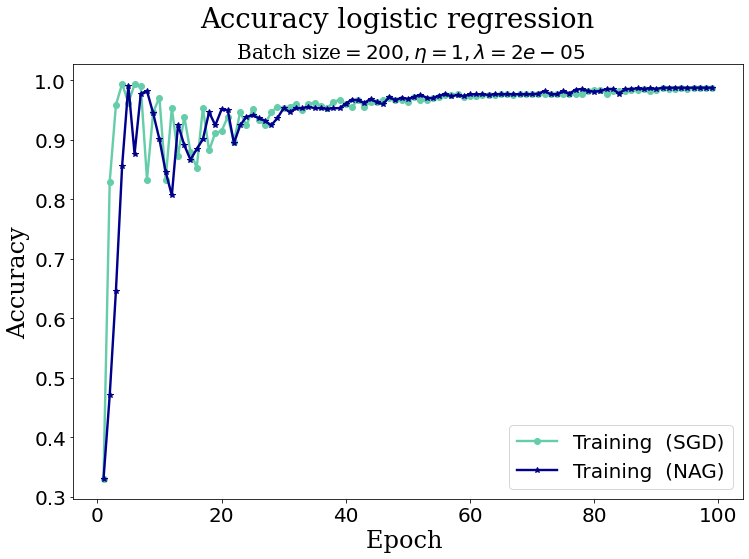

In [108]:
#Changing parameter: Epoch
epoch = np.arange(1,100, 1)

#Fix parameters
penalization = 0.00002 
learning_rate = 1
batches =200
momentum = 0.04

# With SGD
test_accuracy_SGD_epoch = []
train_accuracy_SGD_epoch = []


for n in epoch: 
    accuracy_test = logistic_regression_SGD( x_train, y_train, x_test, y_test, penalization, learning_rate , n , batches)[2]
    accuracy_train = logistic_regression_SGD( x_train, y_train, x_test, y_test, penalization, learning_rate , n , batches)[3]
  
    test_accuracy_SGD_epoch.append(accuracy_test)
    train_accuracy_SGD_epoch.append(accuracy_train)  


#With NAG
test_accuracy_NAG_epoch = []
train_accuracy_NAG_epoch = []

for n in epoch:
    accuracy_test = logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, learning_rate ,momentum, n , batches)[2]
    accuracy_train = logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, learning_rate , momentum, n , batches)[3]
  
    test_accuracy_NAG_epoch.append(accuracy_test)
    train_accuracy_NAG_epoch.append(accuracy_train)  

fig = plt.figure(figsize=(12,8))
fig.suptitle("Accuracy logistic regression",family="serif", fontsize="27.5")

plt.plot(epoch,train_accuracy_SGD_epoch,'-o', color = 'mediumaquamarine',lw = 2.4, label = 'Training  (SGD)')
plt.plot(epoch,train_accuracy_NAG_epoch, '-*',color = 'darkblue',lw = 2.4, label = 'Training  (NAG)')
plt.title(" Batch size$ = {}, \eta = {}, \lambda = {}$".format(batches,learning_rate, penalization), size=20,family="serif")
plt.xlabel("Epoch ", size =24,family="serif")
plt.ylabel("Accuracy", size = 24,family="serif")
plt.legend(prop={'size':20})
#plt.xlim(1,35)
#plt.ylim(0.65,1.05)

# **Predicting with the optimal values and with NAG**

Accuracy Training: 0.9878
Accuracy Test:0.9900


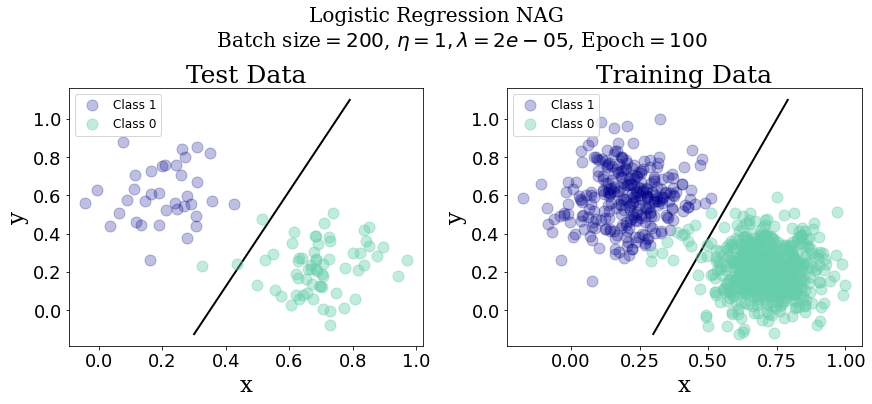

In [ ]:
#Fix values
epoch = 100
batches = 200
momentum = 0.4

learning_rate = 1
penalization = 0.00002
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = logistic_regression_NAG(x_train, y_train, x_test, y_test, penalization, learning_rate ,momentum, epoch , batches)

data_prediction_test = np.concatenate((x_test.T, sigma_prediction_test.T),axis=1)
data_prediction_train = np.concatenate((x_train.T, sigma_prediction_train.T),axis=1)  

#The classes to plot
cls1_test = data_prediction_test[data_prediction_test[:,2] == 1]
cls2_test = data_prediction_test[data_prediction_test[:,2] == 0]

cls1_train = data_prediction_train[data_prediction_train[:,2] == 1]
cls2_train = data_prediction_train[data_prediction_train[:,2] == 0]

#Original line
x= np.arange(0.3,0.8, 0.01)
y = 2.5*x - 0.875  


fig, axs = plt.subplots(1, 2, figsize=(12, 5.5), constrained_layout=True)
fig.suptitle("Logistic Regression NAG\n $~~~~~~ $ Batch size$ = {}$, $\eta = {}, \lambda = {}$, Epoch$ = {}$".format(batches,learning_rate, penalization,epoch),family="serif", fontsize = 20)
from matplotlib import style
style.use('fast')
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

#Test
axs[0].plot(x,y,lw=2, color = 'k')
axs[0].plot(cls1_test[:,0],cls1_test[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[0].plot(cls2_test[:,0],cls2_test[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[0].set_title("Test Data", size=25,family="serif")
axs[0].set_xlabel("x", size =23,family="serif")
axs[0].set_ylabel("y", size = 23,family="serif")
axs[0].legend(prop={'size':12})

#Training
axs[1].plot(x,y,lw=2, color = 'k')
axs[1].plot(cls1_train[:,0],cls1_train[:,1], "ob",color='darkblue', ms=11, alpha=0.25, label='Class 1')
axs[1].plot(cls2_train[:,0],cls2_train[:,1], "ob", color='mediumaquamarine',ms=11, alpha=0.4, label='Class 0')
axs[1].set_title("Training Data", size=25,family="serif")
axs[1].set_xlabel("x", size =23,family="serif")
axs[1].set_ylabel("y", size = 23,family="serif")
axs[1].legend(prop={'size':12})

print("Accuracy Training: {:.4f}\nAccuracy Test:{:.4f}".format(accuracy_train, accuracy_test))

# **MNIST data**

The MNIST database contains **60,000 training** images and **10,000 testing** images.

x_train: (60000, 28, 28)  Data type : uint8
y_train: (60000,)  Data type : int64
x_test:  (10000, 28, 28)  Data type : uint8
y_test:  (10000,)  Data type : int64

 Reshaping and data type changed: 
x_train: (784, 60000)  Data type : uint8
y_train: (1, 60000)  Data type : int64
x_test:  (784, 10000)  Data type : uint8
y_test:  (1, 10000)  Data type : int64


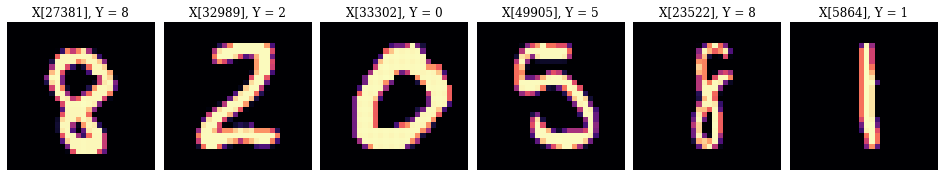

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Model / data parameters
n_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = y_train.astype(int)
y_test = y_test.astype(int)

#Printing the dimension and the data type of the matrix
print('x_train: ' + str(x_train.shape) + '  Data type : ' + str(x_train.dtype))
print('y_train: ' + str(y_train.shape) + '  Data type : ' + str(y_train.dtype))
print('x_test:  '  + str(x_test.shape)+ '  Data type : ' + str(x_test.dtype))
print('y_test:  '  + str(y_test.shape) + '  Data type : ' + str(y_test.dtype))

#Concatenating to get the total data:
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0).astype(int) #astype(int) To change the data type to integer numbers

#Printing some numbers 
figure, ax = plt.subplots(1, 6, figsize=(13, 8), constrained_layout=True)
for i in range(6):
    n = np.random.randint(0,X.shape[0])
    digit = X[n]
    image = digit.reshape(28, 28)
    ax[i].set_title("X[{}], Y = {}".format(n,Y[n]), size=12,family="serif")
    ax[i].imshow(image, cmap=plt.get_cmap('magma'))
    ax[i].axis("off")

#Reshaping the training and the test data
x_test = x_test.reshape(10000, 784).T
x_train = x_train.reshape(60000, 784).T
y_train = np.array([y_train])
y_test = np.array([y_test])

print('\n Reshaping and data type changed: ')
print('x_train: ' + str(x_train.shape) + '  Data type : ' + str(x_train.dtype))
print('y_train: ' + str(y_train.shape) + '  Data type : ' + str(y_train.dtype))
print('x_test:  '  + str(x_test.shape)+ '  Data type : ' + str(x_test.dtype))
print('y_test:  '  + str(y_test.shape) + '  Data type : ' + str(y_test.dtype))

#Reshaping the total data
X = X.reshape(70000, 784).T
Y = np.array([Y])

#Rescale data in interval [0,1]
x_train = x_train/X.max()
x_test = x_test/X.max()


## **Selecting two numbers**

In [ ]:
#1) Choosing the numbers 7 and 9 
index = np.where((Y[0]== 7 ) | (Y[0] == 9))  #tuple
index = index[0]   #array

#New data
x = X[:,index]
y = Y[:, index]

#Replacing the labels with 1 and 0     
y = np.where(y == 7, 1, y)
y = np.where(y == 9, 0, y)

#2) Spliting the data
x_test2, x_train2, y_test2, y_train2 = split_data(x, y)

#3) Rescale data in interval [0,1]
x_train2 = x_train2/x.max()
x_test2 = x_test2/x.max()

#4)Training and predicting
#Cross-validation: Finding the optimal value of the penalization

#Fix parameters: 
learning_rate = 0.1
epoch = 50
batches =  3000
momentum = 0.4

# With SGD
test_accuracy_SGD2 = []
train_accuracy_SGD2 = []
learning_rate = 0.1 

#Changing parameter: penalization
penalization1 =np.linspace(0.00002,1, 50)
for n in penalization1:
    accuracy_test = logistic_regression_SGD(x_train2, y_train2, x_test2, y_test2, n, learning_rate , epoch , batches)[2]
    accuracy_train = logistic_regression_SGD(x_train2, y_train2, x_test2, y_test2, n, learning_rate , epoch , batches)[3]
  
    test_accuracy_SGD2.append(accuracy_test)
    train_accuracy_SGD2.append(accuracy_train)  
   
#With NAG
test_accuracy_NAG2 = []
train_accuracy_NAG2 = []


for n in penalization1:
    accuracy_test = logistic_regression_NAG(x_train2, y_train2, x_test2, y_test2, n, learning_rate ,momentum, epoch , batches)[2]
    accuracy_train = logistic_regression_NAG(x_train2, y_train2, x_test2, y_test2, n, learning_rate , momentum, epoch , batches)[3]
  
    test_accuracy_NAG2.append(accuracy_test)
    train_accuracy_NAG2.append(accuracy_train)  


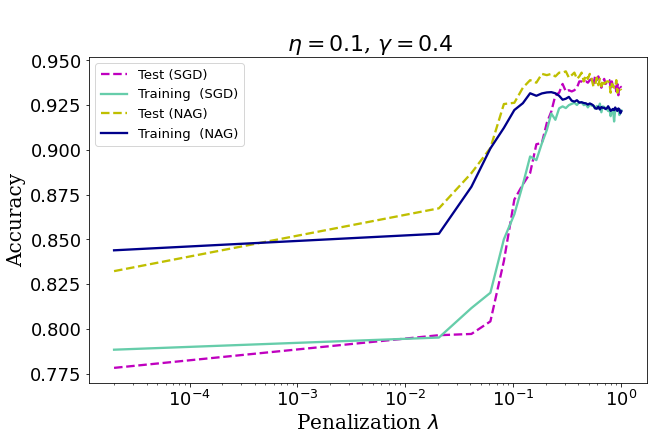

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(penalization1,test_accuracy_SGD2, '--', color = 'm',lw = 2.3, label = 'Test (SGD)')
plt.semilogx(penalization1,train_accuracy_SGD2, color = 'mediumaquamarine',lw = 2.3, label = 'Training  (SGD)')
plt.semilogx(penalization1,test_accuracy_NAG2, '--', color = 'y',lw = 2.3, label = 'Test (NAG)')
plt.semilogx(penalization1,train_accuracy_NAG2, color = 'darkblue',lw = 2.3, label = 'Training  (NAG)')
plt.title(" \n $\eta = {}$, $\gamma = {}$ ".format(learning_rate, momentum), size=22,family="serif")
plt.xlabel("Penalization $\lambda$", size =20,family="serif")
plt.ylabel("Accuracy", size = 20,family="serif")
plt.legend(prop={'size':13.3})
#ax2.set_xlim(10**-4,0.3)

## **Best model : NAG**

Optimal penalization: 0.1

fix values:

learning_rate = 0.1

epoch = 50

batches =  3000

momentum = 0.4

penalization = 0.1 
learning_rate = 0.1 
epoch = 50 \Batch size = 3000 
(1, 1425)

Accuracy test 0.9263, 
Accuracy train 0.9238


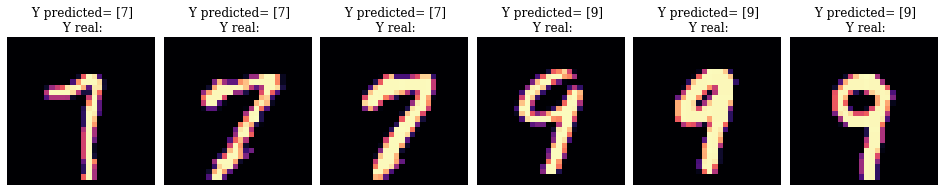

In [ ]:

#Initial values
penalization = 0.1
learning_rate = 0.1
epoch = 50
batches = 3000 
momentum = 0.4
print('penalization = {} \nlearning_rate = {} \nepoch = {} \Batch size = {} '.format(penalization,learning_rate,epoch,batches))
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = logistic_regression_NAG(x_train2, y_train2, x_test2, y_test2,penalization, learning_rate ,momentum, epoch , batches)
print(sigma_prediction_test.shape)                                                                                       
print('\nAccuracy test {:.4f}, \nAccuracy train {:.4f}'.format(accuracy_test, accuracy_train))

#Replacing the labels with 7 and 9    
sigma_prediction_test = np.where(sigma_prediction_test == 1, 7, sigma_prediction_test).astype(int)
sigma_prediction_test = np.where(sigma_prediction_test == 0, 9, sigma_prediction_test).astype(int)

#Ploting the results with the test data
figure, ax = plt.subplots(1, 6, figsize=(13, 8), constrained_layout=True)
for i in range(6):
    n = np.random.randint(0,x_test2.shape[1])
    digit = x_test2[:,n]
    image = digit.reshape(28, 28)
    ax[i].set_title(" Y predicted= {}\n Y real:".format(sigma_prediction_test[:,n]), size=12,family="serif")
    ax[i].imshow(image, cmap=plt.get_cmap('magma'))
    ax[i].axis("off")


# **Softmax Regression of the MNIST**

**Cross-validation (Take some time)**

In [ ]:
#Initialization parameters
epoch = 50
batches =1000
momentum = 0.4

#Encoding y_train and y_test
y_train1 = one_hot_encoding(y_train, 10)
y_test1 = one_hot_encoding(y_test, 10)

#Changing parameter: penalization
penalization1 =np.linspace(0.00002,1, 50)
#Fix parameters: 
learning_rate = 0.1 

# With SGD
test_accuracy_SGD2 = []
train_accuracy_SGD2 = []
for n in penalization1:
    accuracy_test = softmax_regression_SGD(x_train, y_train1, x_test, y_test1, n, learning_rate , epoch , batches)[2]
    accuracy_train = softmax_regression_SGD(x_train, y_train1, x_test, y_test1, n, learning_rate , epoch , batches)[3]
  
    test_accuracy_SGD2.append(accuracy_test)
    train_accuracy_SGD2.append(accuracy_train)  
   

#With NAG
test_accuracy_NAG2 = []
train_accuracy_NAG2 = []
for n in penalization1:
    accuracy_test = softmax_regression_NAG(x_train, y_train1, x_test, y_test1, n, learning_rate ,momentum, epoch , batches)[2]
    accuracy_train = softmax_regression_NAG(x_train, y_train1, x_test, y_test1, n, learning_rate , momentum, epoch , batches)[3]
  
    test_accuracy_NAG2.append(accuracy_test)
    train_accuracy_NAG2.append(accuracy_train)  


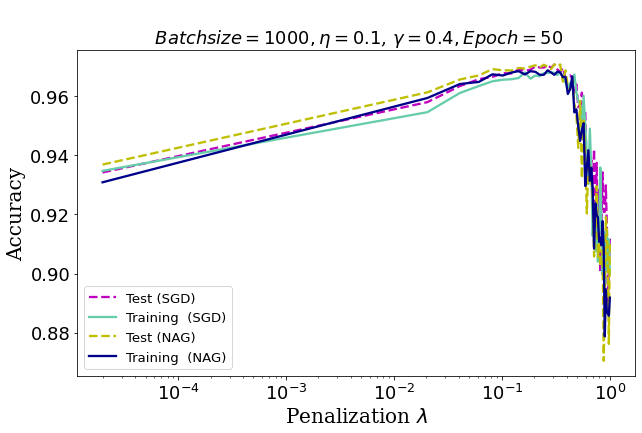

In [ ]:
# showing results
plt.figure(figsize=(10,6))
plt.semilogx(penalization1,test_accuracy_SGD2, '--', color = 'm',lw = 2.3, label = 'Test (SGD)')
plt.semilogx(penalization1,train_accuracy_SGD2, color = 'mediumaquamarine',lw = 2.3, label = 'Training  (SGD)')
plt.semilogx(penalization1,test_accuracy_NAG2, '--', color = 'y',lw = 2.3, label = 'Test (NAG)')
plt.semilogx(penalization1,train_accuracy_NAG2, color = 'darkblue',lw = 2.3, label = 'Training  (NAG)')
plt.title(" \n $Batch size = {}, \eta = {}$, $\gamma = {}, Epoch = {}$".format(batches, learning_rate, momentum, epoch ), size=18,family="serif")
plt.xlabel("Penalization $\lambda$", size =20,family="serif")
plt.ylabel("Accuracy", size = 20,family="serif")
plt.legend(prop={'size':13.3})
#ax2.set_xlim(10**-4,0.3)


# **Predicting**

##**Best model in the test prediction: NAG**

**Optimal value of the penalization : 0.3**

Encoding
y_train: (10, 60000)
y_test:  (10, 10000)

Accuracy test 0.9689, 
Accuracy train 0.9666


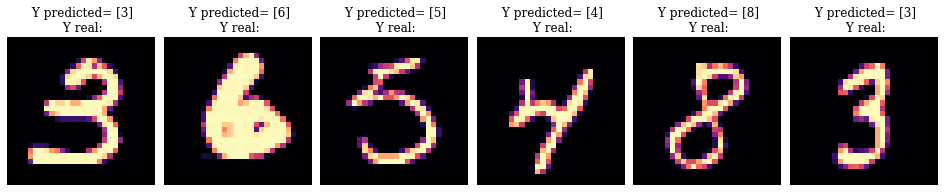

In [ ]:
#Encoding y_train and y_test
y_train1 = one_hot_encoding(y_train, 10)
y_test1 = one_hot_encoding(y_test, 10)

print('Encoding')
print('y_train: ' + str(y_train1.shape))
print('y_test:  '  + str(y_test1.shape))


#Initialization parameters
epoch = 50
penalization = 0.3
learning_rate = 0.1
batches = 1000
momentum = 0.4
n = 10 #number of classes
k = 784 #number of features

sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = softmax_regression_NAG(x_train, y_train1, x_test, y_test1, penalization, learning_rate, momentum,epoch, batches)
#sigma_prediction_test = np.argmax(sigma_prediction_test, axis = 0)    

#Ploting the results with the test data
figure, ax = plt.subplots(1, 6, figsize=(13, 8), constrained_layout=True)
for i in range(6):
    n = np.random.randint(0,x_test.shape[1])
    digit = x_test[:,n]
    image = digit.reshape(28, 28)
    ax[i].set_title(" Y predicted= {}\n Y real:".format(y_test[:,n]), size=12,family="serif")
    ax[i].imshow(image, cmap=plt.get_cmap('magma'))
    ax[i].axis("off")

print('\nAccuracy test {:.4f}, \nAccuracy train {:.4f}'.format(accuracy_test, accuracy_train))


# **Fashion MNIST**

x_train: (60000, 28, 28)  Data type : uint8
y_train: (60000,)  Data type : uint8
x_test:  (10000, 28, 28)  Data type : uint8
y_test:  (10000,)  Data type : uint8

 Reshaping and data type changed: 
x_train: (784, 60000)  Data type : float32
y_train: (1, 60000)  Data type : uint8
x_test:  (784, 10000)  Data type : float32
y_test:  (1, 10000)  Data type : uint8

Encoding
y_train: (10, 60000)
y_test:  (10, 10000)

 Initial values
penalization = 0.3 
learning_rate = 0.1 
epoch = 50 
Batch size = 1000 

Accuracy test 0.9081 
Accuracy train 0.9094


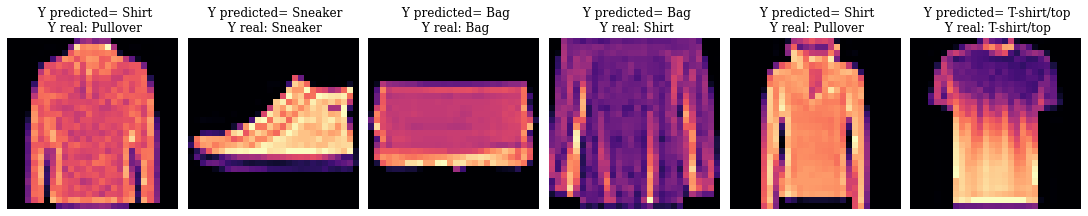

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Model / data parameters
n_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Concatenating to get the total data:
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0) #astype(int) To change the data type to integer numbers

#Printing the dimension and the data type of the matrix
print('x_train: ' + str(x_train.shape) + '  Data type : ' + str(x_train.dtype))
print('y_train: ' + str(y_train.shape) + '  Data type : ' + str(y_train.dtype))
print('x_test:  '  + str(x_test.shape)+ '  Data type : ' + str(x_test.dtype))
print('y_test:  '  + str(y_test.shape) + '  Data type : ' + str(y_test.dtype))

#Reshaping the training and the test data
x_test = x_test.reshape(10000, 784).T
x_train = x_train.reshape(60000, 784).T
y_train1 = np.array([y_train]).astype(int)
y_test1 = np.array([y_test]).astype(int)

#Rescale data in interval [0,1]
x_train = x_train.astype("float32")/X.max()
x_test = x_test.astype("float32")/X.max()

print('\n Reshaping and data type changed: ')
print('x_train: ' + str(x_train.shape) + '  Data type : ' + str(x_train.dtype))
print('y_train: ' + str(y_train1.shape) + '  Data type : ' + str(y_train.dtype))
print('x_test:  '  + str(x_test.shape)+ '  Data type : ' + str(x_test.dtype))
print('y_test:  '  + str(y_test1.shape) + '  Data type : ' + str(y_test.dtype))

#Encoding y_train and y_test
y_train1 = one_hot_encoding(y_train1, 10)
y_test1 = one_hot_encoding(y_test1, 10)

print('\nEncoding')
print('y_train: ' + str(y_train1.shape))
print('y_test:  '  + str(y_test1.shape))

print('\n Initial values')
penalization = 0.3
learning_rate = 0.1
epoch = 50
batches = 1000 
momentum = 0.4
print('penalization = {} \nlearning_rate = {} \nepoch = {} \nBatch size = {} '.format(penalization,learning_rate,epoch,batches))

#Applying the model with Softmax regression NAG
sigma_prediction_test, sigma_prediction_train, accuracy_test, accuracy_train = softmax_regression_NAG(x_train, y_train1, x_test, y_test1,penalization, learning_rate ,momentum, epoch , batches)

#Decoding the prediction 
sigma_prediction_test = np.argmax(sigma_prediction_test, axis = 0)      
                                                                           
print('\nAccuracy test {:.4f} \nAccuracy train {:.4f}'.format(accuracy_test, accuracy_train))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Ploting the results with the test data
figure, ax = plt.subplots(1, 6, figsize=(15, 9), constrained_layout=True)
for i in range(6):
    n = np.random.randint(0,x_test.shape[1])
    digit = x_test[:,n]
    image = digit.reshape(28, 28)
    ax[i].set_title(" Y predicted= {}\n Y real: {}".format(class_names[sigma_prediction_test[n]], class_names[y_test[n]] ), size=12,family="serif")
    ax[i].imshow(image, cmap=plt.get_cmap('magma'))
    ax[i].axis("off")